In [ ]:
    # Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

In [ ]:
    # Loading the dataset

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    
    # Getting the Shape of Training and Test Set

print('Training Set Shape: ',X_train.shape,' , ',y_train.shape)
print('Test Set Shape: ',X_test.shape,' , ',y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
Training Set Shape:  (60000, 28, 28)  ,  (60000,)
Test Set Shape:  (10000, 28, 28)  ,  (10000,)


In [ ]:
    # Creating a list of class labels

labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

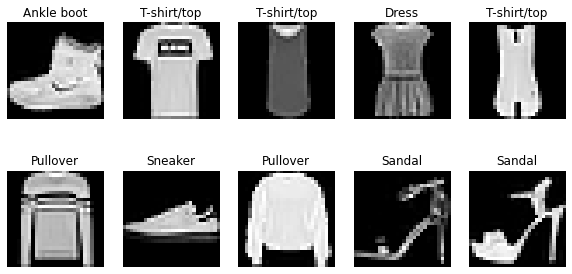

In [ ]:
    # Visualizing some training set images
        # Since the image is 28x28, cv2_imshow will visualize the image in its original size (cv2_imshow() will not expand the image)
        # So matplotlib is used to visualize

plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(labels[y_train[i]])
  plt.axis('off')
plt.show()

In [ ]:
    # Getting the dimension and shape of the training set

print('Dimension: ',X_train.ndim,'\n')
print('Shape: ',X_train.shape)

Dimension:  3 

Shape:  (60000, 28, 28)


In [ ]:
    # Inserting an additional dimension to the dataset to have a single channel

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

print('Training Set Shape: ',X_train.shape)
print('Test Set Shape: ',X_test.shape)

Training Set Shape:  (60000, 28, 28, 1)
Test Set Shape:  (10000, 28, 28, 1)


In [ ]:
    # Normalizing the data
        # Initially, the data was in the range (0 - 255)
        # Now the scaling the data to range (0 - 1) 

X_train = X_train/255
X_test = X_test/255

In [ ]:
    # Building a CNN Model with two Convolutional Layer

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
    # Compiling the Model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',     # Multiclass classification
              metrics=['accuracy'])

In [ ]:
    # Fitting the data to the Model

history = model.fit(X_train, y_train, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 25s 6ms/step - loss: 0.4736 - accuracy: 0.8233
Epoch 2/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3022 - accuracy: 0.8892
Epoch 3/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2580 - accuracy: 0.9056
Epoch 4/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2262 - accuracy: 0.9158
Epoch 5/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2003 - accuracy: 0.9262
Epoch 6/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1832 - accuracy: 0.9325
Epoch 7/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1640 - accuracy: 0.9392
Epoch 8/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1507 - accuracy: 0.9439
Epoch 9/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1356 - accuracy: 0.9497
Epoch 10/40
1875/1875 [==============================] - 12s 6ms/step - l

In [ ]:
    # Making prediction on unseen data

y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred, axis = 1)

    # printing the predictions for first ten instances

print('Predicted Labels: ',y_pred[:10])
print('Actual Labels: ',y_test[:10])

Predicted Labels:  [9 2 1 1 6 1 2 6 5 7]
Actual Labels:  [9 2 1 1 6 1 4 6 5 7]


313/313 [==============================] - 2s 4ms/step - loss: 0.7667 - accuracy: 0.9101
Test Loss:  0.7666538953781128 

Test Accuracy:  0.910099983215332 

Accuracy Score:  91.01 %


Confusion Matrix: 


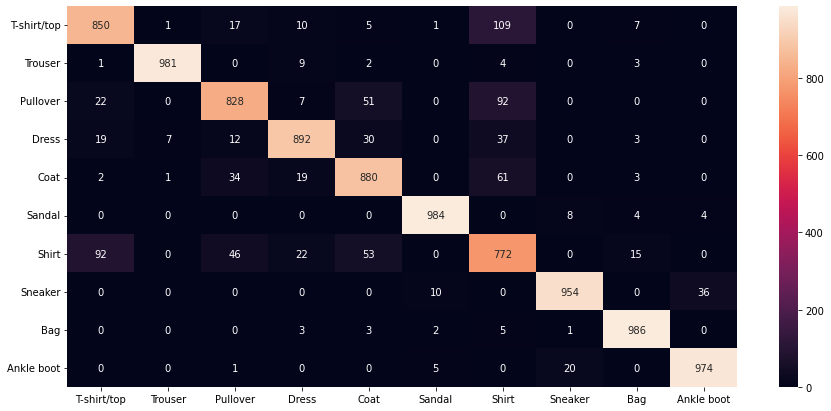

In [ ]:
    # Evaluating the Model

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nTest Loss: ',test_loss,'\n')
print('Test Accuracy: ',test_accuracy,'\n')

print('Accuracy Score: ',accuracy_score(y_pred,y_test)*100,'%\n\n')

plt.figure(figsize=(15,7))
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix: ')
sns.heatmap(cm, annot = True, xticklabels = labels, yticklabels = labels, fmt = 'd');

In [ ]:
    # Summarizing the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2